# Car Prices

🎯 The goal of this challenge is to prepare a dataset and apply some feature selection techniques that you have learned so far.

🚗 We are dealing with a dataset about cars and we would like to predict whether a car is expensive or cheap.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Checking whether a numerical feature has a normal distribution or not
from statsmodels.graphics.gofplots import qqplot

In [2]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

❓ Go ahead and load the CSV into a dataframe called `df`.

In [3]:
# YOUR CODE HERE
df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv')
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


In [4]:
df.shape

(205, 9)

ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

## (1) Duplicates

❓ Remove the duplicates from the dataset if there are any. ❓

*Overwite the dataframe `df`*

In [5]:
# YOUR CODE HERE
df = df.drop_duplicates()
df.shape


(191, 9)

## (2) Missing values

❓ Find the missing values and impute them either with `strategy = "most frequent"` (categorical variables) or `strategy = "median"` (numerical variables) ❓


In [6]:
# YOUR CODE HERE
df.isnull().sum().sort_values(ascending=False)/len(df)

enginelocation    0.052356
carwidth          0.010471
aspiration        0.000000
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

In [7]:
print(df['carwidth'].value_counts())
num_nan = df['carwidth'].isna().sum()
print(f"Number of NaN: {num_nan}")


66.5    22
63.8    19
65.4    15
63.6     9
68.4     9
64       9
64.4     9
65.5     8
65.2     7
65.6     6
64.2     6
67.2     6
66.3     6
66.9     5
67.9     5
*        4
68.9     4
65.7     3
71.7     3
70.3     3
63.9     3
64.8     3
71.4     2
67.7     2
68.3     2
65       2
72.3     1
66.6     1
63.4     1
64.1     1
68       1
72       1
70.5     1
66.1     1
70.6     1
69.6     1
61.8     1
66       1
64.6     1
60.3     1
70.9     1
66.4     1
68.8     1
Name: carwidth, dtype: int64
Number of NaN: 2


In [8]:
df['enginelocation'].value_counts()

front    179
rear       2
Name: enginelocation, dtype: int64

In [9]:
from sklearn.impute import SimpleImputer



### `carwidth`

<details>
    <summary> 💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [10]:
df['carwidth'] = df['carwidth'].replace('*', np.nan)

# Convert 'carwidth' column to numeric type
df['carwidth'] = pd.to_numeric(df['carwidth'], errors='coerce')

# Calculate the median of the 'carwidth' column
median_carwidth = df['carwidth'].median()

# Impute missing values with the median
df['carwidth'].fillna(median_carwidth, inplace=True)

df




,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,65.5,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


### `enginelocation`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [11]:
# YOUR CODE HERE
df['enginelocation'] = df['enginelocation'].replace('rear', 'front')

df['enginelocation'].value_counts()


front    181
Name: enginelocation, dtype: int64

🧪 **Test your code**

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/02-Prepare-the-dataset/data-car-prices/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_carwidth PASSED         [ 50%]
test_missing_values.py::TestMissing_values::test_engine_location FAILED  [100%]

=================================== FAILURES ===================================
___________________ TestMissing_values.test_engine_location ____________________

self = <tests.test_missing_values.TestMissing_values testMethod=test_engine_location>

    def test_engine_location(self):
>       self.assertEqual(self.result.dataset.enginelocation.isnull().sum(), 0)
E       AssertionError: 10 != 0

test_missing_va

In [13]:
! git add tests/missing_values.pickle

! git commit -m 'Completed missing_values step'

! git push origin master


On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Car-Prices.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


## (3) Scaling the numerical features

In [14]:
# As a reminder, some information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      191 non-null    object 
 1   enginelocation  181 non-null    object 
 2   carwidth        191 non-null    float64
 3   curbweight      191 non-null    int64  
 4   enginetype      191 non-null    object 
 5   cylindernumber  191 non-null    object 
 6   stroke          191 non-null    float64
 7   peakrpm         191 non-null    int64  
 8   price           191 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 14.9+ KB


In [15]:
# And here are the numerical features of the dataset we need to scale
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features

Index(['carwidth', 'curbweight', 'stroke', 'peakrpm'], dtype='object')

❓ **Question: Scaling the numerical features** ❓

Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scaler
- Standard Scaler

Replace the original columns with the transformed values.

### `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 <i>Hint</i> </summary>

    
ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions but also some outliers. Hence, it is advisable to use `RobustScaler()`.
</details>

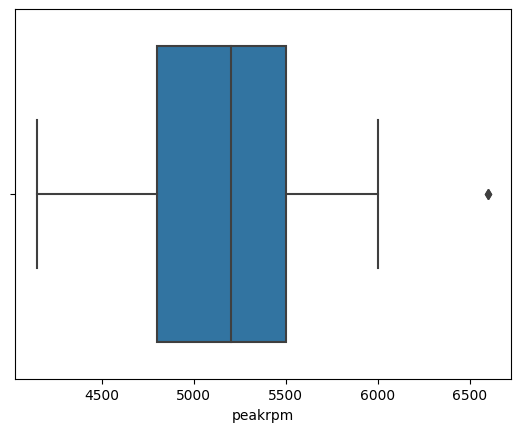

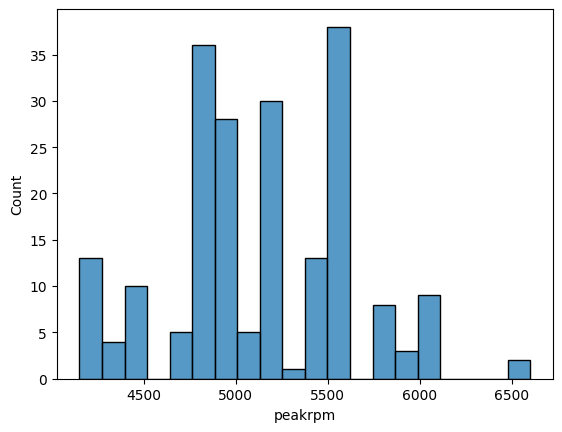

In [6]:
# YOUR CODE HERE
sns.boxplot(x="peakrpm", data = df)
plt.show()
sns.histplot(data = df, x="peakrpm", bins = 20)
plt.show()

In [7]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler

In [18]:
columns_to_scale = ['peakrpm', 'carwidth', 'stroke']

scaler = RobustScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,1.259259,2952,ohc,four,-0.466667,0.428571,expensive
201,turbo,front,1.222222,3049,ohc,four,-0.466667,0.285714,expensive
202,std,front,1.259259,3012,ohcv,six,-1.400000,0.571429,expensive
203,turbo,front,1.259259,3217,ohc,six,0.366667,-0.428571,expensive


### `curbweight`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

<AxesSubplot:xlabel='curbweight'>

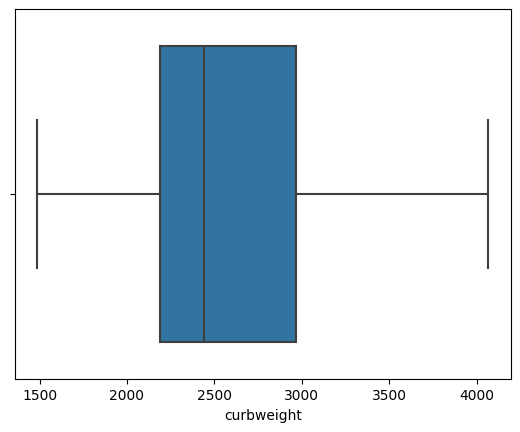

In [19]:
# YOUR CODE HERE
sns.boxplot(x="curbweight", data = df)
#sns.histplot(data = df, x="curbweight", bins = 20)

In [20]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

In [21]:
column_to_scale = ['curbweight']

scaler = StandardScaler()

df[column_to_scale] = scaler.fit_transform(df[column_to_scale])

df


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,1.259259,0.722416,ohc,four,-0.466667,0.428571,expensive
201,turbo,front,1.222222,0.907408,ohc,four,-0.466667,0.285714,expensive
202,std,front,1.259259,0.836844,ohcv,six,-1.400000,0.571429,expensive
203,turbo,front,1.259259,1.227807,ohc,six,0.366667,-0.428571,expensive


🧪 **Test your code**

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/02-Prepare-the-dataset/data-car-prices/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_scaling.py::TestScaling::test_carwidth PASSED                       [ 25%]
test_scaling.py::TestScaling::test_curbweight PASSED                     [ 50%]
test_scaling.py::TestScaling::test_peakrpm PASSED                        [ 75%]
test_scaling.py::TestScaling::test_stroke PASSED                         [100%]

============================== 4 passed in 1.33s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



In [23]:
! git add tests/scaling.pickle

! git commit -m 'Completed scaling step'

! git push origin master


On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Car-Prices.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date


## (4) Encoding the categorical features

❓ **Question: encoding the categorical variables** ❓

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One-hot encoding
- Manual ordinal encoding

In the Dataframe, replace the original features with their encoded version(s).

### `aspiration` & `enginelocation`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [24]:
df.head()
print(df['aspiration'].value_counts())
print(df['enginelocation'].value_counts())

std      156
turbo     35
Name: aspiration, dtype: int64
front    181
Name: enginelocation, dtype: int64


In [9]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder


In [10]:
ohe_binary = OneHotEncoder(sparse_output = False, drop="if_binary") 

#ohe_binary.fit(df[['aspiration','enginelocation']]) 

df[ohe_binary.get_feature_names_out()] = ohe_binary.fit_transform(df[['aspiration','enginelocation']])

# Drop the column "Street" which has been encoded
df.drop(columns = ['aspiration','enginelocation'], inplace = True)

# Show the dataset
df.head(3)



,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price,aspiration_turbo,enginelocation_front,enginelocation_rear,enginelocation_nan
0,64.1,2548,dohc,four,2.68,5000,expensive,0.0,1.0,0.0,0.0
1,64.1,2548,dohc,four,2.68,5000,expensive,0.0,1.0,0.0,0.0
2,65.5,2823,ohcv,six,3.47,5000,expensive,0.0,1.0,0.0,0.0


### `enginetype`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [27]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder


In [28]:
df.shape

(191, 9)

In [29]:
ohe = OneHotEncoder(sparse_output = False) 

ohe.fit(df[['enginetype']]) 

df[ohe.get_feature_names_out()] = ohe.transform(df[['enginetype']])

# Drop the column "Street" which has been encoded
df.drop(columns = ["enginetype"], inplace = True)

# Show the dataset
df.head(3)

,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,aspiration_turbo,enginelocation_nan,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `cylindernumber`

<details>
    <summary>💡 Hint </summary>

ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded into numeric.

</details>

In [30]:
# YOUR CODE HERE
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

ordinal_encoder.fit(df[["cylindernumber"]])

display(ordinal_encoder.categories_)

df["encoded_cylindernumber"] = ordinal_encoder.transform(df[["cylindernumber"]])

df


[array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
       dtype=object)]

,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,aspiration_turbo,enginelocation_nan,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,encoded_cylindernumber
0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.259259,0.722416,four,-0.466667,0.428571,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
201,1.222222,0.907408,four,-0.466667,0.285714,expensive,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
202,1.259259,0.836844,six,-1.400000,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
203,1.259259,1.227807,six,0.366667,-0.428571,expensive,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0


❓ Now that you've made `cylindernumber` into a numeric feature between 2 and 12, you need to scale it ❓

<br/>

<details>
    <summary>💡 Hint </summary>

Look at the current distribution of the `cylindernumber` and ask yourself the following questions:
- Does scaling affect a feature's distribution ?
- According to the distribution of this feature, what is the most appropriate scaling method?
</details>

In [31]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

column_to_scale = ['encoded_cylindernumber']

scaler = MinMaxScaler()

df[column_to_scale] = scaler.fit_transform(df[column_to_scale])

df.rename(columns = {'aspiration_turbo':'aspiration', 'enginelocation_front':'enginelocation'})

,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,aspiration,enginelocation_nan,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,encoded_cylindernumber
0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
2,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000
3,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333
4,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166667
5,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.259259,0.722416,four,-0.466667,0.428571,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333
201,1.222222,0.907408,four,-0.466667,0.285714,expensive,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333
202,1.259259,0.836844,six,-1.400000,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000
203,1.259259,1.227807,six,0.366667,-0.428571,expensive,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000


<details>
    <summary><i>Here is a screenshot of how your dataframe shoud look like after scaling and encoding</i></summary>
    
    
<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/car_price_after_scaling_and_encoding.png">    

</details>

### `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [32]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df['price'])

price = label_encoder.transform(df['price'])
price
new_df = pd.DataFrame({"price": price})
new_df
df2 = df.drop(columns= ['price'])
df = pd.concat([new_df, df2], axis=1)
df

,price,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginelocation_nan,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,encoded_cylindernumber
0,1.0,-0.518519,-0.048068,four,-2.033333,-0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.000000,0.476395,six,0.600000,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000
3,1.0,0.000000,-0.450474,four,0.366667,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333
4,1.0,0.333333,0.478302,five,0.366667,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,1.259259,0.722416,four,-0.466667,0.428571,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333
201,NaN,1.222222,0.907408,four,-0.466667,0.285714,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333
202,NaN,1.259259,0.836844,six,-1.400000,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000
203,NaN,1.259259,1.227807,six,0.366667,-0.428571,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000


🧪 **Test your code**

In [33]:
df = df.rename(columns = {'aspiration_turbo':'aspiration', 'enginelocation_front':'enginelocation'})
df


,price,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration,enginelocation_nan,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,encoded_cylindernumber
0,1.0,-0.518519,-0.048068,four,-2.033333,-0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.000000,0.476395,six,0.600000,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000
3,1.0,0.000000,-0.450474,four,0.366667,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333
4,1.0,0.333333,0.478302,five,0.366667,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,1.259259,0.722416,four,-0.466667,0.428571,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333
201,NaN,1.222222,0.907408,four,-0.466667,0.285714,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333
202,NaN,1.259259,0.836844,six,-1.400000,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000
203,NaN,1.259259,1.227807,six,0.366667,-0.428571,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000


In [34]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/02-Prepare-the-dataset/data-car-prices/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_aspiration PASSED                   [ 25%]
test_encoding.py::TestEncoding::test_enginelocation FAILED               [ 50%]
test_encoding.py::TestEncoding::test_enginetype PASSED                   [ 75%]
test_encoding.py::TestEncoding::test_price PASSED                        [100%]

=================================== FAILURES ===================================
_______________________ TestEncoding.test_enginelocation _______________________

self = <tests.test_encoding.TestEncoding testMethod=test_enginelocation>

    def test_eng

In [35]:
! git add tests/encoding.pickle

! git commit -m 'Completed encoding step'

! git push origin master



[master 35f6e95] Completed encoding step
 1 file changed, 0 insertions(+), 0 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.43 KiB | 733.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:juliensoudet/data-car-prices.git
   1130357..35f6e95  master -> master


## (5) Base Modelling

👏 The dataset has been preprocessed and is now ready to be fitted to a model. 

❓**Question: a first attempt to evaluate a classification model** ❓

Cross-validate a `LogisticRegression` on this preprocessed dataset and save its score under a variable named `base_model_score`.

In [36]:
# YOUR CODE HERE

🧪 **Test your code**

In [37]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

NameError: name 'base_model_score' is not defined

## (6) Feature Selection (with _Permutation Importance_)

👩🏻‍🏫 A powerful way to detect whether a feature is relevant or not to predict a target is to:
1. Run a model and score it
2. Shuffle this feature, re-run the model and score it
    - If the performance significantly dropped, the feature is important and you shoudn't have dropped it
    - If the performance didn't decrease a lot, the feature may be discarded.

❓ **Questions** ❓

1. Perform a feature permutation to detect which features bring the least amount of information to the model. 
2. Remove the weak features from your dataset until you notice model performance dropping substantially
3. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [ ]:
# YOUR CODE HERE

🧪 **Test your code**

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())

NameError: name 'strong_model_score' is not defined

## Bonus - Stratifying your data ⚖️

💡 As we split our data into training and testing, we need to be mindful of the proportion of categorical variables in our dataset - whether it's the classes of our target `y` or a categorical feature in `X`.

Let's have a look at an example 👇

❓ Split your original `X` and `y` into training and testing data, using sklearn's `train_test_split`; use `random_state=1` and `test_size=0.3` to have comparable results.

In [ ]:
# YOUR CODE HERE

❓ Check the proportion of `price` class `1` cars in your training dataset and testing dataset.

> _If you check the proportion of them in the raw `df`, it should be very close to 50/50_

In [ ]:
# YOUR CODE HERE

It should still be pretty close to 50/50 ☝️ 

***But what if we change the random state?*** 

❓ Loop through random states 1 through 10, each time calculating the share of `price` class `1` cars in the training and testing data. ❓

In [ ]:
# YOUR CODE HERE

You will observe that the proportion changes every time, sometimes even quite drastically 😱! This can affect model performance!

❓ Compare the test score of a logistic regression when trained using `train_test_split(random_state=1)` _vs._ `random_state=9` ❓ 

Remember to fit on training data and score on testing data.

In [ ]:
# YOUR CODE HERE

👀 You should see a much lower score with `random_state=9` because the proportion of class `1` cars in that test set is 34.5%, quite far from the 57.9% in the training set or even the 50% in the original dataset.

This is substantial, as this accidental imbalance in our dataset can not only make model performance worse, but also distort the "reality" during training or scoring 🧐

***So how do we fix this issue? How do we keep the same distribution of classes across the train set and the test set? 🔧***

🎁 Luckily, this is taken care of by `cross_validate` in sklearn, when the estimator (a.k.a the model) is a classifier and the target is a class. Check out the documentation of the `cv` parameter in 📚 [**sklearn.model_selection.cross_validate**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

The answer is to use the following:

>📚 [**Stratification**](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

### Stratification of the target

💡 We can also use the ***strafification*** technique in a `train_test_split`.

❓ Run through the same 1 to 10 random state loop again, but this time also ***pass `stratify=y` into the holdout method***. ❓

In [ ]:
# YOUR CODE HERE

👀 Even if the random state is changing, the proportion of classes inside the training and testing data is kept the same as in the original `y`. This is what _stratification_ is.

Using `train_test_split` with the `stratify` parameter, we can also preserve proportions of a feature across training and testing data. This can be extremely important, for example:

- preserving proportion of male and female customers in predicting churn 🙋‍♂️ 🙋
- preserving the proportion big and small houses in predicting their prices 🏠 🏰
- preserving distribution of 1-5 review scores (multiclass!) in recommending the next product 🛍️
- etc...

For instance, in our dataset, to holdout the same share of `aspiration` feature in both training and testing data, we could simply write `train_test_split(X, y, test_size=0.3, stratify=X.aspiration)`

---

As we saw, **`cross_validate` [can automatically stratify the target](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#:~:text=For%20int/None%20inputs%2C%20if%20the%20estimator%20is%20a%20classifier%20and%20y%20is%20either%20binary%20or%20multiclass%2C%20StratifiedKFold%20is%20used.), but not the features...** 🤔 We need a bit of extra work for that.

We need `StratifiedKFold` 🔬



### Stratification - generalized

📚 [**StratifiedKFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) allows us to split the data into `K` splits, while stratifying on certain columns (features or target).

This way, we can do a manual cross-validation while keeping proportions on the categorical features of interest - let's try it with the binary `aspiration` feature:

In [ ]:
from sklearn.model_selection import StratifiedKFold

# initializing a stratified k-fold that will split the data into 5 folds
skf = StratifiedKFold(n_splits=5)
scores = []

# .split() method creates an iterator; 'X.aspiration' is the feature that we stratify by
for train_indices, test_indices in skf.split(X, X.aspiration):
    
    # 'train_indices' and 'test_indices' are lists of indices that produce proportional splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # initialize and fit a model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # append a score to get an average of 5 folds in the end
    scores.append(model.score(X_test, y_test))
    
np.array(scores).mean()

📖 Some sklearn reads on **stratification**:

- [Visualization of how different holdout methods in sklearn work](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)
- [Overall cross-validation and stratification understanding](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

🏁 Congratulations! You have prepared a whole dataset, ran feature selection and even learned about stratification 💪

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!